<a href="https://colab.research.google.com/github/Greta-gerasimov/PyT/blob/L2_feed_f/PT_2%2Bimprov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

из ДР №1:


---

*   обычная функция нахождения производной по х
*   правильно ли я понимаю, что для дифференциирования нужно было использовать





In [1]:
def func(x, z, t):
  return x ** 3 + z - 75 * t

#точка

x = 1
z = 0.5
t = 2

#дифференцирование

dy_dx = (3 * x ** 2)

#вычисление производной в точке

derivative = dy_dx

print('Производная функции в точке (1, 0.5, 2):', derivative)

Производная функции в точке (1, 0.5, 2): 3


In [ ]:
x = torch.tensor([1.], requires_grad=True)
z = torch.tensor([0.5], requires_grad=True)
t = torch.tensor([2.], requires_grad=True)

y = x**3 + z - 75*t

y.backward()

print('dy/dx: ', x.grad)
print('dy/dz: ', z.grad)
print('dy/dt: ', t.grad)

In [2]:
# Сделаем необходимые импорты

In [3]:
import torch
import numpy as np

from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [4]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

In [5]:
FOLDER_PATH = 'C:/Users/Kate/Desktop/PT/'
train_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


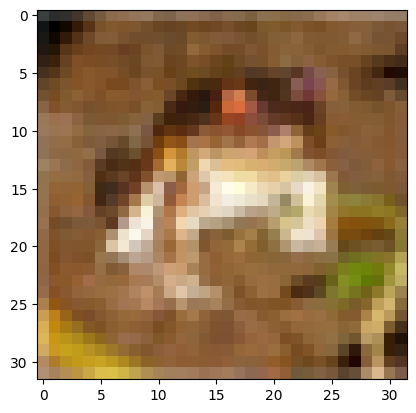

In [6]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [8]:
test_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [11]:

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
       # x = F.softmax(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 256, 10)

In [12]:
# Запустить обучение (по аналогии с тем, что делали на паре)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [14]:
from tqdm import tqdm

In [15]:
num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0



    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/100 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.343
[1,   601] loss: 0.334


  1%|          | 1/100 [00:32<53:23, 32.35s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.305
[2,   601] loss: 0.296


  2%|▏         | 2/100 [00:55<43:55, 26.89s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.285
[3,   601] loss: 0.282


  3%|▎         | 3/100 [01:18<40:31, 25.06s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.276
[4,   601] loss: 0.270


  4%|▍         | 4/100 [01:43<40:07, 25.08s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.265
[5,   601] loss: 0.262


  5%|▌         | 5/100 [02:07<39:11, 24.75s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.258
[6,   601] loss: 0.255


  6%|▌         | 6/100 [02:30<37:47, 24.12s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.250
[7,   601] loss: 0.249


  7%|▋         | 7/100 [02:52<36:26, 23.51s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.244
[8,   601] loss: 0.242


  8%|▊         | 8/100 [03:15<35:45, 23.32s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.240
[9,   601] loss: 0.236


  9%|▉         | 9/100 [03:39<35:26, 23.37s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.234
[10,   601] loss: 0.230


 10%|█         | 10/100 [04:03<35:24, 23.60s/it]

[11,     1] loss: 0.001
[11,   301] loss: 0.229
[11,   601] loss: 0.227


 11%|█         | 11/100 [04:26<34:52, 23.51s/it]

[12,     1] loss: 0.001
[12,   301] loss: 0.224
[12,   601] loss: 0.225


 12%|█▏        | 12/100 [04:49<34:17, 23.38s/it]

[13,     1] loss: 0.001
[13,   301] loss: 0.220
[13,   601] loss: 0.219


 13%|█▎        | 13/100 [05:13<34:12, 23.59s/it]

[14,     1] loss: 0.001
[14,   301] loss: 0.218
[14,   601] loss: 0.215


 14%|█▍        | 14/100 [05:36<33:31, 23.39s/it]

[15,     1] loss: 0.001
[15,   301] loss: 0.213
[15,   601] loss: 0.214


 15%|█▌        | 15/100 [05:59<32:55, 23.24s/it]

[16,     1] loss: 0.001
[16,   301] loss: 0.210
[16,   601] loss: 0.209


 16%|█▌        | 16/100 [06:23<32:54, 23.51s/it]

[17,     1] loss: 0.001
[17,   301] loss: 0.208
[17,   601] loss: 0.207


 17%|█▋        | 17/100 [06:49<33:24, 24.15s/it]

[18,     1] loss: 0.001
[18,   301] loss: 0.199
[18,   601] loss: 0.205


 18%|█▊        | 18/100 [07:13<33:09, 24.27s/it]

[19,     1] loss: 0.001
[19,   301] loss: 0.200
[19,   601] loss: 0.201


 19%|█▉        | 19/100 [07:37<32:39, 24.19s/it]

[20,     1] loss: 0.001
[20,   301] loss: 0.200
[20,   601] loss: 0.198


 20%|██        | 20/100 [08:02<32:24, 24.31s/it]

[21,     1] loss: 0.001
[21,   301] loss: 0.196
[21,   601] loss: 0.194


 21%|██        | 21/100 [08:26<31:57, 24.28s/it]

[22,     1] loss: 0.001
[22,   301] loss: 0.193
[22,   601] loss: 0.192


 22%|██▏       | 22/100 [08:50<31:29, 24.23s/it]

[23,     1] loss: 0.001
[23,   301] loss: 0.190
[23,   601] loss: 0.190


 23%|██▎       | 23/100 [09:14<31:00, 24.16s/it]

[24,     1] loss: 0.001
[24,   301] loss: 0.187
[24,   601] loss: 0.188


 24%|██▍       | 24/100 [09:38<30:23, 23.99s/it]

[25,     1] loss: 0.001
[25,   301] loss: 0.187
[25,   601] loss: 0.185


 25%|██▌       | 25/100 [10:02<30:11, 24.15s/it]

[26,     1] loss: 0.001
[26,   301] loss: 0.185
[26,   601] loss: 0.184


 26%|██▌       | 26/100 [10:26<29:32, 23.95s/it]

[27,     1] loss: 0.001
[27,   301] loss: 0.179
[27,   601] loss: 0.183


 27%|██▋       | 27/100 [10:49<29:00, 23.84s/it]

[28,     1] loss: 0.001
[28,   301] loss: 0.177
[28,   601] loss: 0.181


 28%|██▊       | 28/100 [11:13<28:24, 23.67s/it]

[29,     1] loss: 0.001
[29,   301] loss: 0.175
[29,   601] loss: 0.179


 29%|██▉       | 29/100 [11:37<28:13, 23.85s/it]

[30,     1] loss: 0.001
[30,   301] loss: 0.173
[30,   601] loss: 0.177


 30%|███       | 30/100 [12:01<27:47, 23.83s/it]

[31,     1] loss: 0.001
[31,   301] loss: 0.172
[31,   601] loss: 0.174


 31%|███       | 31/100 [12:24<27:20, 23.78s/it]

[32,     1] loss: 0.000
[32,   301] loss: 0.171
[32,   601] loss: 0.172


 32%|███▏      | 32/100 [12:48<26:55, 23.76s/it]

[33,     1] loss: 0.001
[33,   301] loss: 0.168
[33,   601] loss: 0.170


 33%|███▎      | 33/100 [13:12<26:35, 23.82s/it]

[34,     1] loss: 0.000
[34,   301] loss: 0.167
[34,   601] loss: 0.165


 34%|███▍      | 34/100 [13:36<26:19, 23.93s/it]

[35,     1] loss: 0.001
[35,   301] loss: 0.165
[35,   601] loss: 0.165


 35%|███▌      | 35/100 [14:00<26:00, 24.00s/it]

[36,     1] loss: 0.001
[36,   301] loss: 0.163
[36,   601] loss: 0.162


 36%|███▌      | 36/100 [14:25<25:47, 24.19s/it]

[37,     1] loss: 0.001
[37,   301] loss: 0.160
[37,   601] loss: 0.162


 37%|███▋      | 37/100 [14:48<25:08, 23.95s/it]

[38,     1] loss: 0.001
[38,   301] loss: 0.160
[38,   601] loss: 0.159


 38%|███▊      | 38/100 [15:12<24:30, 23.71s/it]

[39,     1] loss: 0.000
[39,   301] loss: 0.158
[39,   601] loss: 0.156


 39%|███▉      | 39/100 [15:35<24:06, 23.71s/it]

[40,     1] loss: 0.000
[40,   301] loss: 0.154
[40,   601] loss: 0.156


 40%|████      | 40/100 [16:00<23:50, 23.84s/it]

[41,     1] loss: 0.000
[41,   301] loss: 0.153
[41,   601] loss: 0.154


 41%|████      | 41/100 [16:23<23:27, 23.86s/it]

[42,     1] loss: 0.001
[42,   301] loss: 0.152
[42,   601] loss: 0.151


 42%|████▏     | 42/100 [16:47<23:05, 23.89s/it]

[43,     1] loss: 0.001
[43,   301] loss: 0.147
[43,   601] loss: 0.149


 43%|████▎     | 43/100 [17:11<22:36, 23.80s/it]

[44,     1] loss: 0.001
[44,   301] loss: 0.149
[44,   601] loss: 0.146


 44%|████▍     | 44/100 [17:34<22:07, 23.70s/it]

[45,     1] loss: 0.000
[45,   301] loss: 0.144
[45,   601] loss: 0.145


 45%|████▌     | 45/100 [17:58<21:39, 23.62s/it]

[46,     1] loss: 0.000
[46,   301] loss: 0.142
[46,   601] loss: 0.143


 46%|████▌     | 46/100 [18:21<21:05, 23.44s/it]

[47,     1] loss: 0.001
[47,   301] loss: 0.137
[47,   601] loss: 0.142


 47%|████▋     | 47/100 [18:44<20:41, 23.42s/it]

[48,     1] loss: 0.000
[48,   301] loss: 0.135
[48,   601] loss: 0.142


 48%|████▊     | 48/100 [19:10<20:51, 24.06s/it]

[49,     1] loss: 0.000
[49,   301] loss: 0.136
[49,   601] loss: 0.136


 49%|████▉     | 49/100 [19:35<20:42, 24.36s/it]

[50,     1] loss: 0.001
[50,   301] loss: 0.133
[50,   601] loss: 0.137


 50%|█████     | 50/100 [19:59<20:16, 24.34s/it]

[51,     1] loss: 0.000
[51,   301] loss: 0.132
[51,   601] loss: 0.134


 51%|█████     | 51/100 [20:24<19:53, 24.36s/it]

[52,     1] loss: 0.000
[52,   301] loss: 0.130
[52,   601] loss: 0.132


 52%|█████▏    | 52/100 [20:49<19:49, 24.78s/it]

[53,     1] loss: 0.000
[53,   301] loss: 0.128
[53,   601] loss: 0.130


 53%|█████▎    | 53/100 [21:15<19:30, 24.90s/it]

[54,     1] loss: 0.000
[54,   301] loss: 0.126
[54,   601] loss: 0.126


 54%|█████▍    | 54/100 [21:39<18:56, 24.70s/it]

[55,     1] loss: 0.000
[55,   301] loss: 0.123
[55,   601] loss: 0.126


 55%|█████▌    | 55/100 [22:03<18:30, 24.69s/it]

[56,     1] loss: 0.000
[56,   301] loss: 0.121
[56,   601] loss: 0.123


 56%|█████▌    | 56/100 [22:28<18:08, 24.73s/it]

[57,     1] loss: 0.000
[57,   301] loss: 0.119
[57,   601] loss: 0.124


 57%|█████▋    | 57/100 [22:53<17:39, 24.64s/it]

[58,     1] loss: 0.000
[58,   301] loss: 0.117
[58,   601] loss: 0.119


 58%|█████▊    | 58/100 [23:17<17:13, 24.61s/it]

[59,     1] loss: 0.000
[59,   301] loss: 0.115
[59,   601] loss: 0.119


 59%|█████▉    | 59/100 [23:42<16:56, 24.79s/it]

[60,     1] loss: 0.000
[60,   301] loss: 0.112
[60,   601] loss: 0.116


 60%|██████    | 60/100 [24:07<16:27, 24.70s/it]

[61,     1] loss: 0.000
[61,   301] loss: 0.111
[61,   601] loss: 0.116


 61%|██████    | 61/100 [24:31<16:01, 24.66s/it]

[62,     1] loss: 0.000
[62,   301] loss: 0.109
[62,   601] loss: 0.111


 62%|██████▏   | 62/100 [24:57<15:42, 24.80s/it]

[63,     1] loss: 0.000
[63,   301] loss: 0.107
[63,   601] loss: 0.111


 63%|██████▎   | 63/100 [25:22<15:27, 25.07s/it]

[64,     1] loss: 0.000
[64,   301] loss: 0.104
[64,   601] loss: 0.104


 64%|██████▍   | 64/100 [25:47<14:58, 24.97s/it]

[65,     1] loss: 0.000
[65,   301] loss: 0.101
[65,   601] loss: 0.105


 65%|██████▌   | 65/100 [26:12<14:29, 24.85s/it]

[66,     1] loss: 0.000
[66,   301] loss: 0.101
[66,   601] loss: 0.102


 66%|██████▌   | 66/100 [26:36<13:58, 24.67s/it]

[67,     1] loss: 0.000
[67,   301] loss: 0.098
[67,   601] loss: 0.103


 67%|██████▋   | 67/100 [27:00<13:31, 24.60s/it]

[68,     1] loss: 0.000
[68,   301] loss: 0.097
[68,   601] loss: 0.098


 68%|██████▊   | 68/100 [27:25<13:05, 24.55s/it]

[69,     1] loss: 0.000
[69,   301] loss: 0.093
[69,   601] loss: 0.098


 69%|██████▉   | 69/100 [27:49<12:41, 24.58s/it]

[70,     1] loss: 0.000
[70,   301] loss: 0.095
[70,   601] loss: 0.096


 70%|███████   | 70/100 [28:15<12:26, 24.87s/it]

[71,     1] loss: 0.000
[71,   301] loss: 0.093
[71,   601] loss: 0.094


 71%|███████   | 71/100 [28:40<12:02, 24.92s/it]

[72,     1] loss: 0.000
[72,   301] loss: 0.087
[72,   601] loss: 0.091


 72%|███████▏  | 72/100 [29:05<11:37, 24.91s/it]

[73,     1] loss: 0.000
[73,   301] loss: 0.088
[73,   601] loss: 0.090


 73%|███████▎  | 73/100 [29:30<11:11, 24.88s/it]

[74,     1] loss: 0.000
[74,   301] loss: 0.083
[74,   601] loss: 0.086


 74%|███████▍  | 74/100 [29:55<10:52, 25.09s/it]

[75,     1] loss: 0.000
[75,   301] loss: 0.082
[75,   601] loss: 0.086


 75%|███████▌  | 75/100 [30:20<10:26, 25.05s/it]

[76,     1] loss: 0.000
[76,   301] loss: 0.077
[76,   601] loss: 0.082


 76%|███████▌  | 76/100 [30:45<09:55, 24.82s/it]

[77,     1] loss: 0.000
[77,   301] loss: 0.077
[77,   601] loss: 0.081


 77%|███████▋  | 77/100 [31:09<09:26, 24.63s/it]

[78,     1] loss: 0.000
[78,   301] loss: 0.079
[78,   601] loss: 0.081


 78%|███████▊  | 78/100 [31:33<08:59, 24.53s/it]

[79,     1] loss: 0.000
[79,   301] loss: 0.074
[79,   601] loss: 0.078


 79%|███████▉  | 79/100 [31:56<08:27, 24.19s/it]

[80,     1] loss: 0.000
[80,   301] loss: 0.071
[80,   601] loss: 0.078


 80%|████████  | 80/100 [32:20<08:01, 24.05s/it]

[81,     1] loss: 0.000
[81,   301] loss: 0.072
[81,   601] loss: 0.073


 81%|████████  | 81/100 [32:44<07:36, 24.01s/it]

[82,     1] loss: 0.000
[82,   301] loss: 0.071
[82,   601] loss: 0.072


 82%|████████▏ | 82/100 [33:08<07:10, 23.91s/it]

[83,     1] loss: 0.000
[83,   301] loss: 0.065
[83,   601] loss: 0.073


 83%|████████▎ | 83/100 [33:31<06:44, 23.77s/it]

[84,     1] loss: 0.000
[84,   301] loss: 0.065
[84,   601] loss: 0.071


 84%|████████▍ | 84/100 [33:55<06:19, 23.73s/it]

[85,     1] loss: 0.000
[85,   301] loss: 0.064
[85,   601] loss: 0.067


 85%|████████▌ | 85/100 [34:19<05:57, 23.82s/it]

[86,     1] loss: 0.000
[86,   301] loss: 0.060
[86,   601] loss: 0.063


 86%|████████▌ | 86/100 [34:42<05:32, 23.72s/it]

[87,     1] loss: 0.000
[87,   301] loss: 0.065
[87,   601] loss: 0.063


 87%|████████▋ | 87/100 [35:06<05:07, 23.69s/it]

[88,     1] loss: 0.000
[88,   301] loss: 0.059
[88,   601] loss: 0.064


 88%|████████▊ | 88/100 [35:30<04:45, 23.78s/it]

[89,     1] loss: 0.000
[89,   301] loss: 0.056
[89,   601] loss: 0.059


 89%|████████▉ | 89/100 [35:54<04:21, 23.78s/it]

[90,     1] loss: 0.000
[90,   301] loss: 0.055
[90,   601] loss: 0.061


 90%|█████████ | 90/100 [36:17<03:57, 23.79s/it]

[91,     1] loss: 0.000
[91,   301] loss: 0.051
[91,   601] loss: 0.056


 91%|█████████ | 91/100 [36:41<03:34, 23.81s/it]

[92,     1] loss: 0.000
[92,   301] loss: 0.051
[92,   601] loss: 0.054


 92%|█████████▏| 92/100 [37:05<03:10, 23.82s/it]

[93,     1] loss: 0.000
[93,   301] loss: 0.052
[93,   601] loss: 0.052


 93%|█████████▎| 93/100 [37:29<02:47, 23.87s/it]

[94,     1] loss: 0.000
[94,   301] loss: 0.049
[94,   601] loss: 0.050


 94%|█████████▍| 94/100 [37:53<02:22, 23.79s/it]

[95,     1] loss: 0.000
[95,   301] loss: 0.047
[95,   601] loss: 0.048


 95%|█████████▌| 95/100 [38:16<01:58, 23.74s/it]

[96,     1] loss: 0.000
[96,   301] loss: 0.048
[96,   601] loss: 0.051


 96%|█████████▌| 96/100 [38:41<01:35, 23.86s/it]

[97,     1] loss: 0.000
[97,   301] loss: 0.047
[97,   601] loss: 0.045


 97%|█████████▋| 97/100 [39:05<01:11, 23.97s/it]

[98,     1] loss: 0.000
[98,   301] loss: 0.044
[98,   601] loss: 0.045


 98%|█████████▊| 98/100 [39:28<00:47, 23.81s/it]

[99,     1] loss: 0.000
[99,   301] loss: 0.042
[99,   601] loss: 0.044


 99%|█████████▉| 99/100 [39:52<00:23, 23.73s/it]

[100,     1] loss: 0.000
[100,   301] loss: 0.039
[100,   601] loss: 0.042


100%|██████████| 100/100 [40:16<00:00, 24.16s/it]

Training is finished!


In [16]:
PATH_WEIGHTS = 'C:/Users/Kate/Desktop/PT/cifar_net_weight.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [ ]:
print ('Model state dict:')
for param in net.state_dict():
    print(param, '\t', net.state_dict())

In [18]:
net = Net(3072, 256, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)

In [19]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


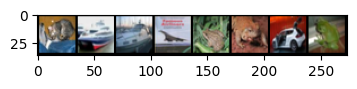

In [20]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(4, 2))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [21]:
net.predict(images);

<ipython-input-11-99276d73dfec>:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [22]:
_, imgs_predicted = torch.max(outputs, 1)
imgs_predicted

tensor([3, 8, 0, 2, 4, 6, 1, 6])

In [23]:
print('Predicted ', ' '.join(classes[imgs_predicted[j]] for j in range(len(labels))))

Predicted  cat ship plane bird deer frog car frog


In [24]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[imgs_predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'plane' 'bird' 'deer' 'frog' 'car' 'frog']
Accuracy is 0.625
